# Описание

Данная тетрадка содержит в себе первое задание по компьютерному практикуму по экономике. Вам предстоит освоить ряд важных библиотек для Python, изучить основы Latex, а также создать экономические модели.

Все задания связаны с моделями бюджетных ограничений и предпочтений.
* В первой модели существуют только два товара определенной цены.
* Во второй модели определены 3 параметра: название, цена и количество товара, которое потребитель может получить бесплатно. За товар сверх этого количества необходимо заплатить указанную цену.
* В третьей модели для каждого товара есть порог количества. Товар в количестве ниже данного порога стоит одну цену, а каждая единица товара выше этого порога стоит другую цену.

Ожидается, что Вы разберетесь в представленных примерах и по их образцу сделаете более сложные задания. Также стремитесь к тому, чтобы Ваш код и Ваши пояснения были понятными. При необходимости комментируйте код и оставляйте заметки в текстовых полях.

## Баллы

За каждое задание начисляется определенное количество баллов. Если задание решено не полностью, то за него может быть начислена только часть баллов.

|№ Задания|Балл|
|---|---|
|[Задание 1](#task_1)|0.5|
|[Задание 2](#task_2)|0.5|
|[Задание 3](#task_3)|0.5|
|[Задание 4](#task_4)|0.5|
|[Задание 5](#task_5)|1|
|[Задание 6](#task_6)|0.5|
|[Задание 7](#task_7)|1|
|[Задание 8](#task_8)|1|
|[Задание 9](#task_9)|0.5|
|[Задание 10](#task_10)|0.5|
|[Задание 11](#task_11)|1|
|[Задание 12](#task_12)|1|
|[Задание 13](#task_13)|1.5|
|Всего|10|

## Импорт библиотек

In [ ]:
#Импортируем необходимые библиотеки

import math
import numpy as np # Линейная алгебра и многомерные массивы
import pandas as pd # Работа с таблицами данных
import matplotlib.pyplot as plt # Графическая библиотека
from ipywidgets import widgets, interact # Интерактивные виджеты

# Техническая функция. Иногда потребуется сравнивать два float числа на равенство
def is_equal(x, y):
    return abs(x-y) < 1e-6

# Модель 1

## Описание класса

В данной модели у каждого товара есть только два параметра: название и цена за единицу.

In [ ]:
# Создадим класс для товаров модели
class Good():
    def __init__(self, name, price):
        self.name = name
        self.price = price

## Проверка бюджетного ограничения

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [ ]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
    Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    result = x1*g1.price + x2*g2.price
    if (is_equal(result, budget)): # Поскольку значения типа float, необходимо сравнивать на равенство с погрешностью
        return 0
    elif (result < budget):
        return 1
    else:
        return -1

g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100
print(budget_test(g1, g2, budget, 1, 1))
print(budget_test(g1, g2, budget, 10, 10))
print(budget_test(g1, g2, budget, 100, 100))

1
0
-1


## Графическое представление

Напишем функцию, которая будет визуализировать бюджетное множество и проверяемую точку.

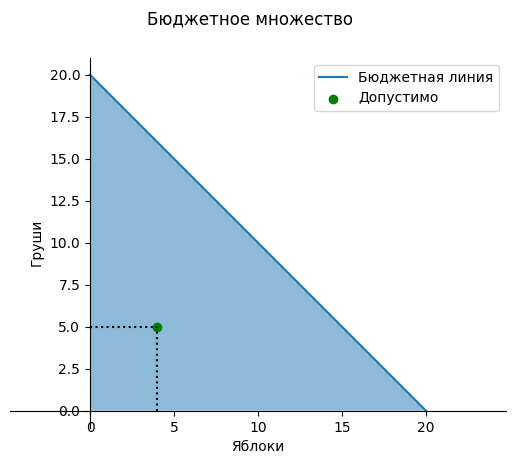

In [ ]:

def plot_budget(g1, g2, budget, x1=0, x2=0):
    '''
    Построение графика бюджетного множества и расположения проверяемой точки
    '''

    # График будет построен по двум точкам (0, budget/g2.price) и (budget/g1.price, 0)
    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]


    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")

    ax.plot(x_points, y_points, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5

    point_status = budget_test(g1, g2, budget, x1, x2) # Находим статус проверяемой точки

    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else:
        point_color = "red"
        point_label = "Недопустимо"

    ax.scatter(x1, x2, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x1, x1], [0, x2], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x1], [x2, x2], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)

    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)

    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок


g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100
plot_budget(g1, g2, budget, 4, 5);

## Интерактивное представление

In [ ]:
# Интерактивный виджет
def interactive_plot(p1, p2, budget, x1, x2):
    g1 = Good("Яблоки", p1) # Создаем первый товар с ценой p1
    g2 = Good("Груши", p2) # Создаем второй товар с ценой p2
    plot_budget(g1, g2, budget, x1, x2);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), x1 = (1,10), x2=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

## Работа с таблицами

В данном разделе мы будем работать с таблицами. Вначале мы загрузим данные из Excel файла в датафрейм библиотеки pandas. Затем мы обработаем строки этой таблицы, и для каждой строки проверим, выполняется ли бюджетное ограничение, и результаты сохраним в новый датафрейм. Далее мы отфильтруем получившийся датафрейм по условию, что бюджетное ограничение выполняется (в том числе на границе). Результат мы отсортируем по размеру бюджета и сохраним в новый Excel файл.

Файл model1_data.xlsx должен находиться в том же каталоге, что и данная тетрадка. Файл можно скачать по [данной ссылке](http://samonenko.ru/upload/model1_data.xlsx).

In [ ]:
df = pd.read_excel("/content/model1_data.xlsx") # Загрузим таблицу из Excel файла в датафрейм
df # Печатаем датафрейм

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant
0,Яблоки,5,Груши,5,50,5,5
1,Яблоки,5,Груши,5,51,5,5
2,Апельсины,5,Мандарины,5,49,5,5
3,Виоград,2,Малина,3,30,23,45
4,Виоград,2,Малина,3,30,6,8
5,Виоград,2,Малина,3,45,6,8


In [ ]:
result = []
for index, row in df.iterrows(): # Цикл по всем строкам df
    # Строка сохраняется в словаре row, где ключами являются имена столбцов

    # Для каждой строки создаем продукты
    g1 = Good(row['G1_name'], row['G1_price'])
    g2 = Good(row['G2_name'], row['G2_price'])

    result.append(budget_test(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))

df["Result"] = result # Создаем в df новый столбец Result и сохраняем в него список значений result
df

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
2,Апельсины,5,Мандарины,5,49,5,5,-1
3,Виоград,2,Малина,3,30,23,45,-1
4,Виоград,2,Малина,3,30,6,8,-1
5,Виоград,2,Малина,3,45,6,8,1


In [ ]:
df_super = df[df["Result"] >= 0] # Фильтруем датафрейм по условию, что в столбце Result значение >= 0 и сохраняем в новый датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
5,Виоград,2,Малина,3,45,6,8,1


In [ ]:
df_super = df_super.sort_values(by = 'Budget') # Сортируем датафрейм по столбцу Budget и сохраняем в тот же датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
5,Виоград,2,Малина,3,45,6,8,1
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1


In [ ]:
df_super.to_excel("model1_result.xlsx") # Сохраняем

## Обратная задача

### Случай двух товаров

Решим обратную задачу, теперь мы должны узнать стоимости товаров, если известны точки, которые лежат на границе кривой бюджетных ограничений.

Пусть нам известно, что две точки $A_1 = (a_{1,1}, a_{1,2})$ и $A_2 = (a_{2,1}, a_{2,2})$ лежат на границе кривой бюджетных ограничений. В нашей модели бюджетное ограничение задается прямой вида:
$$p_1 x_1 + p_2 x_2 = b,$$
где $p_1$ -- цена единицы первого продукта, $p_2$ -- цена единицы второго продукта и $b$ -- общий бюджет. Без ограничения общности мы можем считать, что $b=1$, т.е. мы должны найти значения цены единиц продукта как долей от общего бюджета.

Таким образом, нам надо решить систему линейных уравнений:
$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} = 1\\
p_1 a_{2,1} + p_2 a_{2,2} = 1
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} \\
    a_{2,1} & a_{2,2}
\end{pmatrix}
\begin{pmatrix}
    p_1 \\
    p_2
\end{pmatrix}
=
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

Решением является:
$$
\begin{pmatrix}
        p_1 \\
        p_2
\end{pmatrix}
=
\begin{pmatrix}
        a_{1,1} && a_{1,2} \\
        a_{2,1} && a_{2,2}
\end{pmatrix}^{-1}
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

При этом надо учесть, что $p_1 > 0$ и $p_2 > 0$, в противном случае полученное решение не соответствует изучаемой модели.

In [ ]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''

    ones = np.ones([2,1]) # матрица 2x1 из единиц

    # np.linalg.inv() -- поиск обратной матрицы
    # A @ B -- матричное умножение
    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [1,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,2],
    [2,2]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [2,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,1],
    [2,2]
]
print(get_goods_parameters(list_of_points))


[[0.33333333]
 [0.33333333]]
None
None
None


### Графическое представление

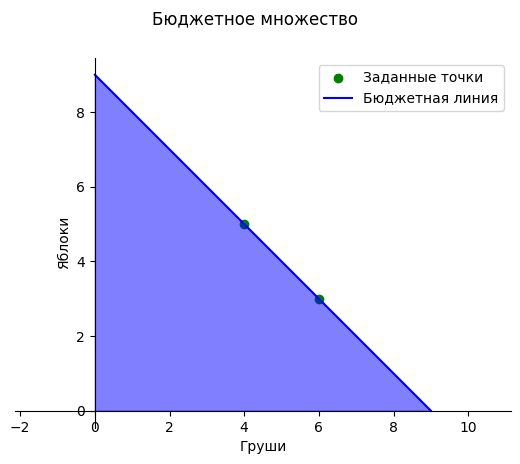

In [ ]:
def plot_goods_parameters(list_of_points):

    fig, ax = plt.subplots() # Создаем фигуру

    list_of_points = np.array(list_of_points)
    x_values = list_of_points.T[0]
    y_values = list_of_points.T[1]
    ax.scatter(x_values, y_values, label="Заданные точки", color="green")

    ax.axis('equal') # Принудительно делаем оси равными

    result = get_goods_parameters(list_of_points)
    if not (result is None):
        fig.suptitle("Бюджетное множество")
        g1 = Good("Груши", result[0][0])
        g2 = Good("Яблоки", result[1][0])
        budget = 1
        x_points = [0, budget/g1.price]
        y_points = [budget/g2.price, 0]

        ax.plot(x_points, y_points, label="Бюджетная линия", color="blue") # Строим прямую по двум точкам
        ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color="blue") # Заливаем область под графиком с прозрачностью (alpha) 0.5

         # Добавляем название осей
        ax.set_xlabel(g1.name)
        ax.set_ylabel(g2.name)

        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)

    else:
        fig.suptitle("Модель не предусматривает решения")

    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show()



list_of_points = [
    [4,5],
    [6,3]
]
plot_goods_parameters(list_of_points)

### Интерактивное представление

In [ ]:
# Интерактивный виджет
def interactive_plot(x11, x12, x21, x22):
    list_of_points = [
        [x11, x12],
        [x21, x22]
    ]
    plot_goods_parameters(list_of_points);

interact(interactive_plot, x11=(1, 10), x12 = (1, 10), x21=(1, 10), x22 = (1, 10));

interactive(children=(IntSlider(value=5, description='x11', max=10, min=1), IntSlider(value=5, description='x1…

### Случай трех товаров

Отметим, что рассуждения и код практически не поменяются, если речь пойдет о трех товарах и трех точках в трехмерном пространстве.

Пусть нам даны три точки $A_1 = (a_{1,1}, a_{1,2}, a_{1,3})$, $A_2 = (a_{2,1}, a_{2,2}, a_{2,3})$ и $A_3 = (a_{3,1}, a_{3,2}, a_{3,3})$. Надо решить систему линейных уравнений:

$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} + p_3 a_{1,3}= 1\\
p_1 a_{2,1} + p_2 a_{2,2} + p_3 a_{2,3}= 1\\
p_1 a_{3,1} + p_2 a_{3,2} + p_3 a_{3,3}= 1\\
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
=
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

Решением является:
$$
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
=
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}^{-1}
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

In [ ]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''

    ones = np.ones([3,1]) # единственное изменение тут

    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [0,0,1],
    [0,1,0],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

[[1.]
 [1.]
 [1.]]
None


### Случай $n$ товаров. <font color="red">Задание 1.</font> <a id="task_1"></a>

Реализуйте предыдущий пример для случая $n$ товаров. Вам надо написать поясняющий текст, используя $\LaTeX$, а также реализовать саму функцию.

Пусть нам даны $n$ точек $A_1 = (a_{1,1}, a_{1,2}, \dots ,a_{1,n})$, $A_2 = (a_{2,1}, a_{2,2}, \dots, a_{2,n})$, $\dots$, $A_n = (a_{n,1}, a_{n,2}, \dots, a_{n,n})$. Надо решить систему линейных уравнений:

<font color="red">**Тут Ваш текст**</a>



$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} + \dots\ + p_n a_{1,n}= 1\\
p_1 a_{2,1} + p_2 a_{2,2} + \dots\ + p_n a_{2,n}= 1\\
\dots\\
p_1 a_{n,1} + p_2 a_{n,2} + \dots\ + p_n a_{n,n}= 1\\
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} & \dots\ & a_{1,n}\\
    a_{2,1} & a_{2,2} & \dots\ & a_{2,n}\\
    \dots\\
    a_{n,1} & a_{n,2} & \dots\ & a_{n,n}\\
\end{pmatrix}
\begin{pmatrix}
        p_1 \\
        p_2 \\
        \dots\\
        p_n
\end{pmatrix}
=
\begin{pmatrix}
        1 \\
        1 \\
        1 \\
        1
\end{pmatrix}
$$

Решением является:
$$
\begin{pmatrix}
        p_1 \\
        p_2 \\
        \dots\\
        p_n
\end{pmatrix}
=
\begin{pmatrix}
    a_{1,1} & a_{1,2} & \dots\ & a_{1,n}\\
    a_{2,1} & a_{2,2} & \dots\ & a_{2,n}\\
    \dots\\
    a_{n,1} & a_{n,2} & \dots\ & a_{n,n}\\
\end{pmatrix}^{-1}
\begin{pmatrix}
        1 \\
        1 \\
        \dots\\
        1
\end{pmatrix}
$$

In [ ]:
def get_goods_parameters(list_of_points: np.array):
    #Тут Ваш код
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''
    a = list(list_of_points) # сделаем из tuple list, чтобы получить n = количеству строк в матрице(количество точек)
    ones = np.ones([len(a),1]) # матрица nx1 из единиц


    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution



list_of_points = np.eye(10) # Единичная матрица
print(get_goods_parameters(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))


[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
None


## Кривые безразличия

### Параметры функции полезности Кобба-Дугласа

Напишем функцию, которая будет строить графики кривых безразличия функции полезности Кобба-Дугласа вида
$$c = x^{\alpha}y^{1-\alpha}$$
при различных значениях параметров $c$ и $\alpha$.

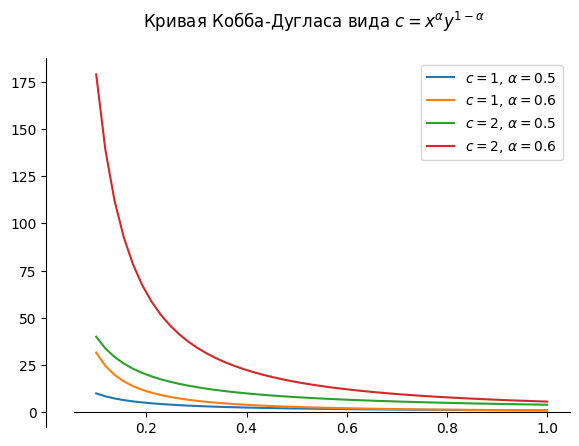

In [ ]:
def Cobb_Douglas(x, c=1, alpha=0.9):
    # Выразим в явном виде y как функцию от x
    return math.pow(x, -alpha/(1-alpha))*math.pow(c, 1/(1-alpha))

def plot_Cobb_Douglas(c_values, alpha_values):
    x_values = np.linspace(0.1, 1) # Массив из 50 точек от 0.1 до 1

    fig, ax = plt.subplots()
    fig.suptitle("Кривая Кобба-Дугласа вида $c = x^{\\alpha}y^{1-\\alpha}$") # Двойные слеши нужны, чтобы не экранировать следующий символ

    for c in c_values:
        for alpha in alpha_values:
            y_values = [Cobb_Douglas(x, c, alpha) for x in x_values]
            ax.plot(x_values, y_values,label=f"$с = {c}$, $\\alpha = {alpha} $")


    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.legend()


c_values = [1, 2]
alpha_values = [0.5, 0.6]
plot_Cobb_Douglas(c_values, alpha_values)

### Поиск и визуализация оптимального решения для функции Кобба-Дугласса

Напишем функцию, которая по информации о двух товарах, бюджете и параметре $\alpha$ функции полезности Кобба-Дугласа найдет оптимальное решение, т.е. точку касания кривой безразличия функции Кобба-Дугласа и границы бюджетного ограничения.

Известно, что решение можно найти по формуле:
$$
\begin{cases}
x_1 = \frac{\alpha}{g1.price}\\
x_2 = \frac{1-\alpha}{g2.price}\\
\end{cases}
$$

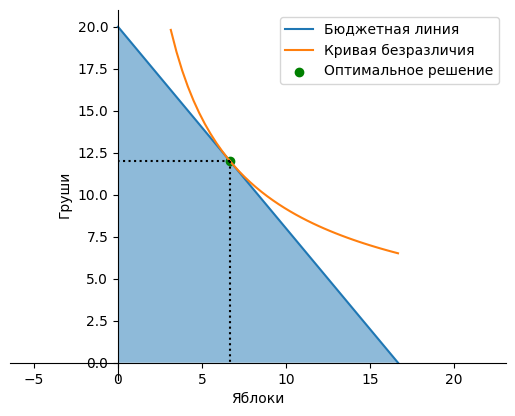

In [ ]:
def budget_Cobb_Douglas_solution(g1, g2, budget, alpha=0.5):
    '''
        При заданных ценах на товары, бюджете и параметре alpha находит оптимальное решение и
        значение выражения x^(alpha) * y^(1-alpha)
    '''
    x_solution = alpha*budget/g1.price
    y_solution = (1-alpha)*budget/g2.price
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)

def plot_budget_Cobb_Douglas(g1, g2, budget, alpha=0.5):
    x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)

    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]
    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)

    x_values = np.linspace(0.1, budget/g1.price)
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < budget/g2.price
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good("Яблоки", 6)
g2 = Good("Груши", 5)
budget = 100
alpha = 0.4
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

### Интерактивная визуализация оптимального решения для функции Кобба-Дугласа

In [ ]:
def interactive_plot(p1, p2, budget, alpha):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

### Параметры функции полезности Леонтьева. <font color="red">Задание 2</font> <a id="task_2"></a>

Напишите код, который визуализирует графики кривых безразличия для функции Леонтьева вида
$$
с = \min(\frac{x}{a}, \frac{y}{b})
$$
при различных значениях параметров $а$ и $b$.

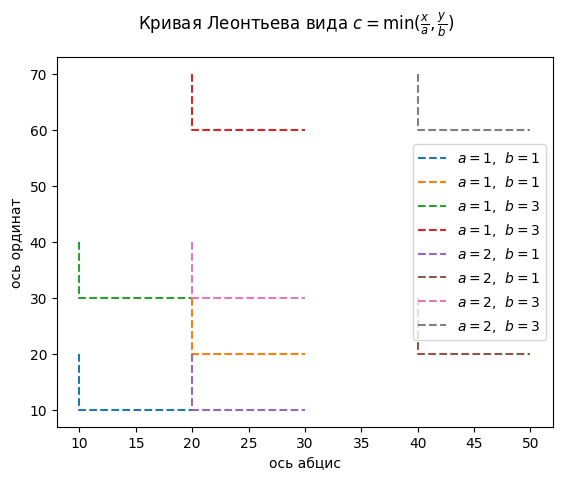

In [ ]:

def plot_Leontev(a_values, b_values,c_values):
    # Тут Ваш код
    x_values = np.linspace(0.1, 1)
    fig, ax = plt.subplots()
    fig.suptitle("Кривая Леонтьева вида $с = \\min(\\frac{x}{a}, \\frac{y}{b})$ ")
    x_values = np.linspace(0.1, 1)
    ax.set_xlabel('ось абцис')
    ax.set_ylabel('ось ординат')


    # зададим массив c_values,  чтобы показать как выглядит семейство линий уровня
    for a in a_values:
      for b in b_values:
        for c in c_values:
          # строим по трем точкам: угловая, одна вертикально от угловой, одна горизонтально от угловой
          ax.plot([a*c,a*c,a*c+10], [b*c+10,b*c,b*c], '--', label=f"$a = {a}$, $\\ b = {b} $")# увеличим наши точки, по которым задаем график, на 10, чтобы было нагляднее видно, что прямые уходят в бесконечность


    ax.legend()
a_values = [1, 2]
b_values = [1, 3]
c_values = [10, 20]
plot_Leontev(a_values, b_values, c_values)




### Поиск и визуализация оптимального решения для функции полезности Леонтьева. <font color="red">Задание 3</font> <a id="task_3"></a>

Для двух заданных товаров $g1$, $g2$, величины бюджета $budget$, а также параметров $a$ и $b$ функции полезности Леонтьева, найдите оптимальное решение и визуализируйте его.

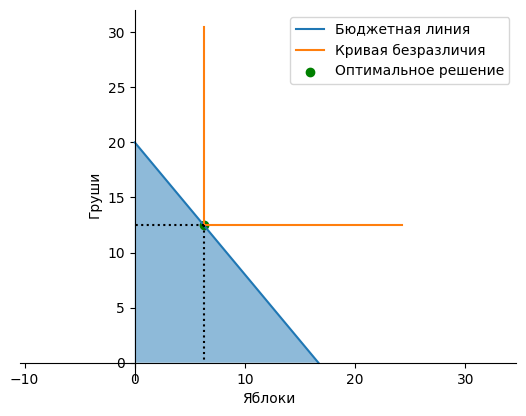

In [ ]:
def budget_Leontev_solution(g1, g2, budget, a, b):
  # найдем и условия, что x/a = y/b and p1*x1 + p2 * x2 = budget, из этой системы уравнений можно найти оптимальные точки
  x_solution = (a*budget)/(g1.price*a + g2.price*b)
  y_solution = (b*budget)/(g1.price*a + g2.price*b)

  return x_solution, y_solution, min(x_solution, y_solution)

def plot_budget_Leontev(g1, g2, budget, a, b):
  x_solution, y_solution, c = budget_Leontev_solution(g1, g2, budget, a, b)

  x_points = [0, budget/g1.price]
  y_points = [budget/g2.price, 0]
  fig, ax = plt.subplots()
  ax.plot(x_points, y_points, label="Бюджетная линия")
  ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)

  x_values = [x_solution,x_solution,x_solution+18]
  y_values = [y_solution+18,y_solution,y_solution]

  ax.plot(x_values, y_values,label="Кривая безразличия")

  ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
  ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
  ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
  ax.set_xlabel(g1.name)
  ax.set_ylabel(g2.name)
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_visible(False)
  ax.axis('equal')
  ax.legend()
  plt.show()



g1 = Good("Яблоки", 6)
g2 = Good("Груши", 5)
budget = 100
a = 1
b = 2
plot_budget_Leontev(g1, g2, budget, a, b)






### Интерактивная визуализация оптимального решения для функции полезности Леонтьева

In [ ]:
def interactive_plot(p1, p2, budget, a, b):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Leontev(g1, g2, budget, a, b);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), a=(1,10), b=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 2

## Описание класса

В данной модели у каждого товара есть три параметра: название, цена и количество такого товара, которое можно получить бесплатно.
Это означает, что потребитель всегда может получить бесплатно товар в заданном количестве, а за каждую следующую единицу товара необходимо заплатить указанную цену.

In [ ]:
class Good1():
    def __init__(self, name, price, free):
        self.name = name
        self.price = price
        self.free = free # Количество продукта, которое можно получить бесплатно

## Проверка бюджетного ограничения. <font color="red">Задание 4</font><a id="task_4"></a>

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [ ]:
def budget_test1(g1: Good1, g2: Good1, budget, x1=0, x2=0):
    '''
        Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    if x1 <= g1.free and x2 > g2.free: # случай, когда первого товара меньше или равно, чем количество первого товара, которое можно получить бесплатно, следовательно, он потребляется бесплатно, второго же товара больше, чем количество второго товара, которое можно получить бесплатно, значит, мы платим за разницу
      result = (x2 - g2.free)*g2.price
    elif x1 > g1.free and x2 <= g2.free: # аналогичный случай, только теперь для второго товара
      result = (x1 - g1.free)*g1.price
    elif x1 <= g1.free and x2 <= g2.free: # случай, когда обоих товаров меньше или столько же, сколько этих же товаров можно потреблять бесплатно
      result = 0
    else: # обратный случай, считаем разницу для каждого товара
      result = (x1 - g1.free)*g1.price + (x2 - g2.free)*g2.price
    # сравниваем с бюджетом
    if (is_equal(result, budget)):
        return 0
    elif (result < budget):
        return 1
    else:
        return -1

g1 = Good1("Яблоки", 10, 1)
g2 = Good1("Груши", 10, 1)
budget = 100
print(budget_test1(g1, g2, budget, 5, 6))
print(budget_test1(g1, g2, budget, 6, 6))
print(budget_test1(g1, g2, budget, 6, 7))

1
0
-1


## Графическое представление. <font color="red">Задание 5.</font> <a id="task_5"></a>

Напишите функцию, которая будет изображать бюджетное множество и проверяемую точку.

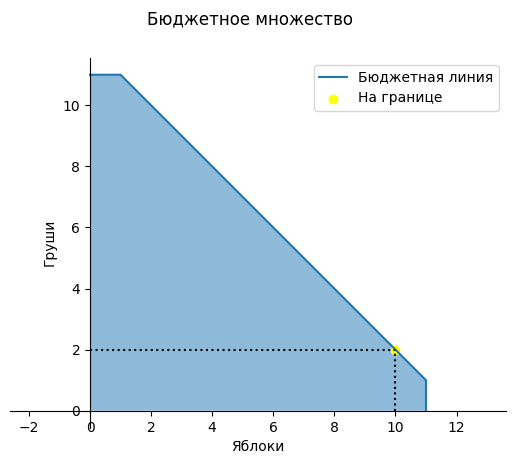

In [ ]:
def plot_budget1(g1: Good1, g2: Good1, budget, x, y):
    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")
    l1 = np.array([0, g1.free, g1.free +budget/g1.price, g1.free +budget/g1.price]) # создаем список координат по оси ОХ
    l2 = np.array([budget/g2.price + g2.free, g2.free + budget/g2.price, g2.free, 0])# # создаем список координат по оси ОY
    # первая точка: 0 по х(не покупаем товар 1) и максимальное количество товара 2
    # вторая точка: бесплатное количесто товара 1 по х и максимальное количество товара 2, так как опять не тратим ничего на товар 1
    # третья точка: максимальное количество товара 1, так как не тратим ничего на товар 2  и бесплатное количесто товара 2 по у
    # четвертая точка: максимальное количество товара 1 по х и 0 по у (не покупаем товар 2)
    ax.plot(l1,l2, label="Бюджетная линия") # строим по 4 точкам
    ax.fill_between(l1, l2, np.zeros_like(l1), alpha=0.5) # заполняем



    point_status = budget_test1(g1, g2, budget, x, y) # Находим статус проверяемой точки

    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else:
        point_color = "red"
        point_label = "Недопустимо"

    ax.scatter(x, y, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x, x], [0, y], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x], [y, y], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)

    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)

    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок


g1 = Good1("Яблоки", 10, 1)
g2 = Good1("Груши", 10, 1)
budget = 100
plot_budget1(g1, g2, budget, 10, 2)





## Интерактивное представление

In [ ]:
def interactive_plot(p1, f1, p2, f2, budget, x, y):
    g1 = Good1("Яблоки", p1, f1)
    g2 = Good1("Груши", p2, f2)
    plot_budget1(g1, g2, budget, x, y);

interact(interactive_plot, p1=(1, 10), f1=(0, 10), p2 = (1, 10), f2=(0,10), budget=(1,100), x=(0,10), y=(0,10))

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='f1'…

<function __main__.interactive_plot(p1, f1, p2, f2, budget, x, y)>

## Работа с таблицами. <font color="red">Задание 6</font><a id="task_7"></a>

Выполните аналогичные действия, как и с моделью 1, а именно:
* Создайте файл model2_data.xlsx по аналогии с тем, как устроен файл model1_data.xlsx. И добавьте в него как минимум 10 строчек.
* Загрузите данные из таблицы model2_data.xlsx
* Для каждой записи проверьте, выполнено ли бюджетное ограничение.
* Отфильтруйте только те варианты, в которых бюджетное ограничение выполняется (в том числе и на границе).
* Отсортируйте таблицу по столбцу G1_free.
* Результат сохраните в файл model2_result.xlsx

Допускается в этом задании вместо Excel файлов использовать csv файлы.

In [ ]:
# Тут Ваш код

df = pd.read_excel('/content/model2_data.xlsx') # ссылка на сам файл( лежит на гугл диске) https://docs.google.com/spreadsheets/d/1oJbBRkjVpNCcCa0tn4_VrT2h5I5Yzds2/edit?usp=sharing&ouid=111191777688565181607&rtpof=true&sd=true
df # Печатаем датафрейм

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,G1_free,G2_free
0,Картофель,10,Кабачки,21,45,3,5,2,6
1,Картофель,10,Цветная капуста,5,56,5,5,2,4
2,Брокколи,8,Кабачки,21,49,5,5,5,6
3,Баклажаны,2,Кабачки,21,30,23,45,2,6
4,Фасоль,7,Шпинат,3,30,6,8,3,2
5,Помидоры,6,Картофель,10,45,6,8,5,2
6,Цвеиная капуста,5,Шпинат,3,57,2,9,4,2
7,Морковь,7,Кабачки,21,43,1,5,9,6
8,Помидоры,6,Морковь,7,34,2,13,1,9
9,Фасоль,7,Кабачки,21,15,3,1,3,6


In [ ]:
result = []
for index, row in df.iterrows(): # Цикл по всем строкам df
    # Строка сохраняется в словаре row, где ключами являются имена столбцов

    # Для каждой строки создаем продукты
    g1 = Good1(row['G1_name'], row['G1_price'], row['G1_free'])
    g2 = Good1(row['G2_name'], row['G2_price'],row['G2_free'])

    result.append(budget_test1(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))

df["Result"] = result # Создаем в df новый столбец Result и сохраняем в него список значений result
df

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,G1_free,G2_free,Result
0,Картофель,10,Кабачки,21,45,3,5,2,6,1
1,Картофель,10,Цветная капуста,5,56,5,5,2,4,1
2,Брокколи,8,Кабачки,21,49,5,5,5,6,1
3,Баклажаны,2,Кабачки,21,30,23,45,2,6,-1
4,Фасоль,7,Шпинат,3,30,6,8,3,2,-1
5,Помидоры,6,Картофель,10,45,6,8,5,2,-1
6,Цвеиная капуста,5,Шпинат,3,57,2,9,4,2,1
7,Морковь,7,Кабачки,21,43,1,5,9,6,1
8,Помидоры,6,Морковь,7,34,2,13,1,9,0
9,Фасоль,7,Кабачки,21,15,3,1,3,6,1


In [ ]:
df_super = df[df["Result"] >= 0] # Фильтруем датафрейм по условию, что в столбце Result значение >= 0 и сохраняем в новый датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,G1_free,G2_free,Result
0,Картофель,10,Кабачки,21,45,3,5,2,6,1
1,Картофель,10,Цветная капуста,5,56,5,5,2,4,1
2,Брокколи,8,Кабачки,21,49,5,5,5,6,1
6,Цвеиная капуста,5,Шпинат,3,57,2,9,4,2,1
7,Морковь,7,Кабачки,21,43,1,5,9,6,1
8,Помидоры,6,Морковь,7,34,2,13,1,9,0
9,Фасоль,7,Кабачки,21,15,3,1,3,6,1


In [ ]:
df_super = df_super.sort_values(by = 'G1_free') # Сортируем датафрейм по столбцу G1_free и сохраняем в тот же датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,G1_free,G2_free,Result
8,Помидоры,6,Морковь,7,34,2,13,1,9,0
0,Картофель,10,Кабачки,21,45,3,5,2,6,1
1,Картофель,10,Цветная капуста,5,56,5,5,2,4,1
9,Фасоль,7,Кабачки,21,15,3,1,3,6,1
6,Цвеиная капуста,5,Шпинат,3,57,2,9,4,2,1
2,Брокколи,8,Кабачки,21,49,5,5,5,6,1
7,Морковь,7,Кабачки,21,43,1,5,9,6,1


In [ ]:
df_super.to_excel("model2_result.xlsx") # Сохраняем

## Обратная задача. <font color="red">Задание 7</font> <a id="task_7"></a>

Пусть нам даны четыре точки $A_1 = (a_{1,1}, a_{1,2})$, $A_2 = (a_{2,1}, a_{2,2})$, $A_3 = (a_{3,1}, a_{3,2})$ и $A_4 = (a_{4,1}, a_{4,2})$. Необходимо определить, существуют ли параметры Модели 2, т.е. значения __price >0__ и __free >= 0__ для двух товаров такие, чтобы граница бюджетной линии содержала указанные точки. Если такие параметры существуют для рассматриваемой модели, то необходимо вывести параметры модели и изобразить ее бюджетное ограничение. Если таких параметров не существует, то необходимо вывести сообщение об этом.

Реализуйте графический интерактивный интерфейс, визуализирующий решение данной задачи, по аналогии с тем, как это сделано для Модели 1.

In [ ]:
# для понимания: запрос будет выглядеть таким образом
list_of_points = [
    [1,1],
    [2,2],
    [3,3],
    [0,4]
]



In [ ]:
# создадим функцию для сортировки точек по х координате
def sort_values_x(list_of_points):
  points = (list_of_points[0][0],list_of_points[0][1]),(list_of_points[1][0],list_of_points[1][1]),(list_of_points[2][0], list_of_points[2][1]), (list_of_points[3][0], list_of_points[3][1])
  return sorted(points)
print(sort_values_x(list_of_points))

[(0, 4), (1, 1), (2, 2), (3, 3)]


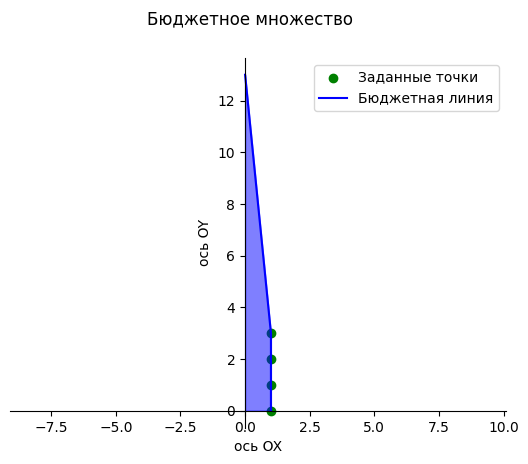

0 3 10.0 1


In [ ]:
# созданин функцию, которая будет определять можно ли провести бюджетные линии
def get_goods_parameters(list_of_points: np.array):
  fig, ax = plt.subplots() # Создаем фигуру

  list_of_points = np.array(list_of_points)

  ax.axis('equal') # Принудительно делаем оси равными
  #создадим список точек по х
  X = list_of_points.T[0]

  #создадим список точек по y
  Y = list_of_points.T[1]

  ax.axis('equal') # Принудительно делаем оси равными
  #создаем список сортированных точек по координате x
  sort_x  = sort_values_x(list_of_points)

  # для того, чтобы проверить различные ли у нас точки, создадим сеты из координат по х и по у
  amount_x = set(X)
  amount_y = set(Y)
  cnt = 0
  # рассмотрим случай: все координаты по х и по у разные
  if len(amount_x) == 4 and len(amount_y) == 1:
    # плучается такой случай возможен, когда все наши различные точки лежат на горизантальной прямой, тогда мы в любом случае сможем постороить кривую безразличия, когда все 4 точки на горизонтальной
    # пусть в этом случае у второго товара free=0, у первого значение максимального у
    fig.suptitle("Бюджетное множество")
    ax.scatter(X, Y, label="Заданные точки", color="green")

    x_points = np.array([0, sort_x[3][0], sort_x[3][0]+ 10])
    y_points = np.array([sort_x[0][1], sort_x[0][1], 0])

    ax.plot(x_points, y_points, label="Бюджетная линия", color="blue") # Строим прямую по 4 точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color="blue") # Заливаем область под графиком с прозрачностью (alpha) 0.5

         # Добавляем название осей
    ax.set_xlabel('ось OX')
    ax.set_ylabel('ось OY')

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show()
    # теперь находим значения параметров
    # пусть товар 2 - это  композитивный  товар, у него цена = 1
    free1 = sort_x[3][0]
    free2 = 0
    price1 = sort_x[0][1] / sort_x[3][0]
    price2 = 1
    print(free1,free2,price1,price2)
  elif len(amount_x) == 1 and len(amount_y) == 4:
    # плучается такой случай возможен, когда все наши различные точки лежат на вертикальной прямой, тогда мы в любом случае сможем постороить кривую безразличия, когда все 4 точки на вертикальной
    # пусть в этом случае у первого товара free=0, у второго значение максимального x
    fig.suptitle("Бюджетное множество")
    ax.scatter(X, Y, label="Заданные точки", color="green")

    x_points = np.array([0, sort_x[0][0], sort_x[0][0]])
    y_points = np.array([max(Y) + 10, max(Y), 0])

    ax.plot(x_points, y_points, label="Бюджетная линия", color="blue") # Строим прямую по 4 точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color="blue") # Заливаем область под графиком с прозрачностью (alpha) 0.5

         # Добавляем название осей
    ax.set_xlabel('ось OX')
    ax.set_ylabel('ось OY')

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show()
    # теперь находим значения параметров
    # пусть товар 2 - это  композитивный  товар, у него цена = 1
    free1 = 0
    free2 = max(Y)
    price1 = 10 / sort_x[0][0]
    price2 = 1
    print(free1,free2,price1,price2)

  elif len(amount_x) == len(amount_y) == 4:
    # будем строить по 4 точка ( так как мы знаем, что у нас все координаты по х и у разные есть только случай, когда одна точка лежит на вертикальной прямой, две другие на среднем участке, последняя на горизонтальной прямой)
    # возьмем две средние точки (2 и 3 точки) из отсортированных, пусть они лежат на одной прямой, тогда найдем тангенс пряиой где они лежат
    edge = abs(sort_x[1][1] - sort_x[2][1]) / abs(sort_x[1][0] - sort_x[2][0])
    # теперь определим, возможно ли нарисовать по этим точкам бюджетное ограничение
     # создадим переменную для удобства
    cnt = 0
    if sort_x[1][0] - sort_x[0][0] < edge * (max(Y) - max(sort_x[1][1],sort_x[2][1])):
      cnt = -1
    elif min(sort_x[1][1],sort_x[2][1])  - min(Y) < edge * (sort_x[3][0] - sort_x[2][0]):
      cnt = -1
    if cnt == 0:
        fig.suptitle("Бюджетное множество")
        ax.scatter(X, Y, label="Заданные точки", color="green")

        x_points = np.array([0, sort_x[1][0] - edge * (max(Y) - max(sort_x[1][1],sort_x[2][1])), sort_x[3][0], sort_x[3][0]])
        y_points = np.array([max(Y), max(Y), min (sort_x[1][1],sort_x[2][1]) - edge* (sort_x[3][0] - sort_x[2][0]), 0])

        ax.plot(x_points, y_points, label="Бюджетная линия", color="blue") # Строим прямую по 4 точкам
        ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color="blue") # Заливаем область под графиком с прозрачностью (alpha) 0.5

         # Добавляем название осей
        ax.set_xlabel('ось OX')
        ax.set_ylabel('ось OY')

        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)
        ax.legend() # Отображаем легенду (информацию о данных)
        plt.show()
        # теперь находим значения параметров
    # пусть товар 2 - это  композитивный  товар, у него цена = 1
        free1 = sort_x[1][0] - edge * (max(Y) - max(sort_x[1][1],sort_x[2][1]))
        free2 = min (sort_x[1][1],sort_x[2][1]) - edge* (sort_x[3][0] - sort_x[2][0])
        price1 = (max(Y) - min (sort_x[1][1],sort_x[2][1]) - edge* (sort_x[3][0] - sort_x[2][0])) / sort_x[3][0]
        price2 = 1
        print(free1,free2,price1,price2)

    else:
        fig.suptitle("Модель не предусматривает решения")
        ax.set_xlabel('ось OX')
        ax.set_ylabel('ось OY')
        ax.legend() # Отображаем легенду (информацию о данных)
        plt.show()
  elif len(amount_x) == 4 and len(amount_y) == 2:
    # плучается такой случай возможен, когда три наши различные точки лежат на вертикальной прямой, и одна не лежит на вертикальной
    if sort_x[0][1] == sort_x[1][1] == sort_x[2][1] and sort_x[0][1] > sort_x[3][1] and sort_x[2][0] < sort_x[3][0]:
      fig.suptitle("Бюджетное множество")
      ax.scatter(X, Y, label="Заданные точки", color="green")

      x_points = np.array([0, sort_x[2][0], sort_x[3][0], sort_x[3][0]])
      y_points = np.array([sort_x[0][1], sort_x[0][1], sort_x[3][1], 0])

      ax.plot(x_points, y_points, label="Бюджетная линия", color="blue") # Строим прямую по 4 точкам
      ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color="blue") # Заливаем область под графиком с прозрачностью (alpha) 0.5

         # Добавляем название осей
      ax.set_xlabel('ось OX')
      ax.set_ylabel('ось OY')

      ax.spines['left'].set_position('zero')
      ax.spines['right'].set_visible(False)
      ax.spines['bottom'].set_position('zero')
      ax.spines['top'].set_visible(False)
      ax.legend() # Отображаем легенду (информацию о данных)
      plt.show()
    # теперь находим значения параметров
    # пусть товар 2 - это  композитивный  товар, у него цена = 1
      free1 = sort_x[3][0]
      free2 = sort_x[3][1]
      price1 = (sort_x[0][1] - sort_x[3][1]) / sort_x[3][0]
      price2 = 1
      print(free1,free2,price1,price2)
    else:
      fig.suptitle("Модель не предусматривает решения")
      ax.set_xlabel('ось OX')
      ax.set_ylabel('ось OY')
      ax.legend() # Отображаем легенду (информацию о данных)
      plt.show()
  elif len(amount_x) == 2 and len(amount_y) == 4:
      # плучается такой случай возможен, когда три наши различные точки лежат на вертикальной прямой, и одна не лежит на вертикальной
      if sort_x[1][0] == sort_x[2][0] == sort_x[3][0] and sort_x[0][0] < sort_x[1][0] and sort_x[0][1] == max(Y):
        fig.suptitle("Бюджетное множество")
        ax.scatter(X, Y, label="Заданные точки", color="green")

        x_points = np.array([0, sort_x[0][0], sort_x[1][0], sort_x[1][0]])
        y_points = np.array([sort_x[0][1], sort_x[0][1], max(sort_x[1][1], sort_x[2][1], sort_x[3][1]), 0])

        ax.plot(x_points, y_points, label="Бюджетная линия", color="blue") # Строим прямую по 4 точкам
        ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color="blue") # Заливаем область под графиком с прозрачностью (alpha) 0.5

          # Добавляем название осей
        ax.set_xlabel('ось OX')
        ax.set_ylabel('ось OY')

        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)
        ax.legend() # Отображаем легенду (информацию о данных)
        plt.show()
      # теперь находим значения параметров
      # пусть товар 2 - это  композитивный  товар, у него цена = 1
        free1 = sort_x[0][0]
        free2 = max(sort_x[1][1], sort_x[2][1], sort_x[3][1])
        price1 = (sort_x[0][1] - max(sort_x[1][1], sort_x[2][1], sort_x[3][1])) / sort_x[1][0]
        price2 = 1
        print(free1,free2,price1,price2)
      else:
        fig.suptitle("Модель не предусматривает решения")
        ax.set_xlabel('ось OX')
        ax.set_ylabel('ось OY')
        ax.legend() # Отображаем легенду (информацию о данных)
        plt.show()



list_of_points = [
    [1,3],
    [1,2],
    [1,1],
    [1,0]
]
get_goods_parameters(list_of_points)


interactive(children=(IntSlider(value=5, description='x11', max=10, min=1), IntSlider(value=5, description='x1…

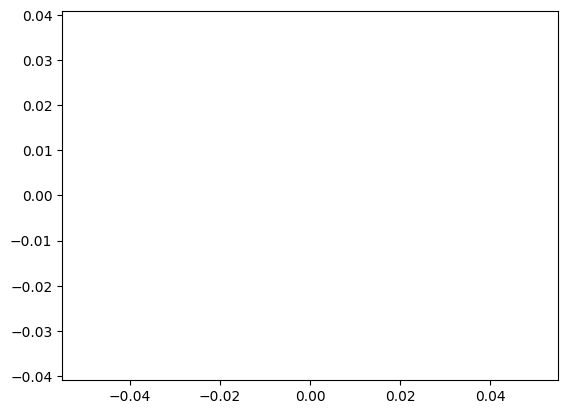

In [ ]:
def interactive_plot1(x11, x12, x21, x22,x31,x32,x41,x42):
    list_of_points = [
        [x11, x12],
        [x21, x22],
        [x31, x32],
        [x41, x42]

    ]
    get_goods_parameters(list_of_points);

interact(interactive_plot1, x11=(1, 10), x12 = (1, 10), x21=(1, 10), x22 = (1, 10), x31 = (1, 10),x32 = (1, 10),x41 = (1, 10),x42 = (1, 10));

## Кривые безразличия. <font color="red">Задание 8</font> <a id="task_8"></a>

Для двух товаров из Модели 2 и кривой безразличия функции Кобба-Дугласа найдите оптимальное решение и визуализируйте его при помощи интерактивного виджета.

Пример работы расположен по [данной ссылке](https://samonenko-econom-practice-example-streamlit-app-yyqr46.streamlit.app/)

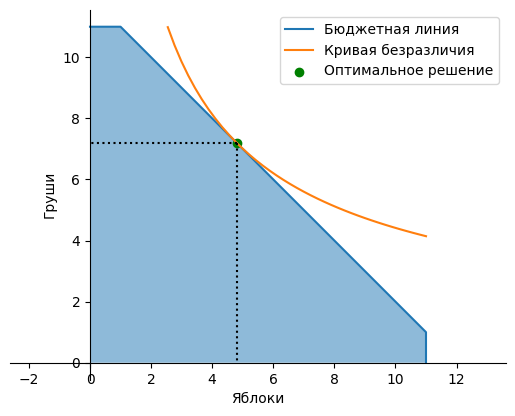

In [ ]:
def budget_Cobb_Douglas_solution(g1: Good1, g2: Good1, budget, alpha=0.5):
    '''
        При заданных ценах на товары, бюджете и параметре alpha находит оптимальное решение и
        значение выражения x^(alpha) * y^(1-alpha)
    '''
    if  g1.free >= alpha*(budget + g1.price * g1.free + g2.price * g2.free)/g1.price and g2.free < (1 - alpha)*(budget + g1.price * g1.free + g2.price * g2.free)/g2.price:

      x_solution = g1.free
      y_solution = g2.free + budget/g2.price
    elif g1.free >= alpha*(budget + g1.price * g1.free + g2.price * g2.free)/g1.price and g2.free >= (1 - alpha)*(budget + g1.price * g1.free + g2.price * g2.free)/g2.price:
      x_solution = g1.free
      y_solution = g2.free
    elif  g1.free < alpha*(budget + g1.price * g1.free + g2.price * g2.free)/g1.price and g2.free > (1 - alpha)*(budget + g1.price * g1.free + g2.price * g2.free)/g2.price:
      x_solution = g1.free + budget/g1.price
      y_solution = g2.free
    else:
      x_solution = alpha*(budget + g1.price * g1.free + g2.price * g2.free)/g1.price
      y_solution = (1 - alpha)*(budget + g1.price * g1.free + g2.price * g2.free)/g2.price

    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)

def plot_budget_Cobb_Douglas1(g1, g2, budget, alpha=0.5):
    x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)


    fig, ax = plt.subplots()
    l1 = np.array([0, g1.free, g1.free +budget/g1.price, g1.free +budget/g1.price]) # создаем список координат по оси ОХ
    l2 = np.array([budget/g2.price + g2.free, g2.free + budget/g2.price, g2.free, 0])# # создаем список координат по оси ОY
    ax.plot(l1,l2, label="Бюджетная линия") # строим по 4 точкам
    ax.fill_between(l1, l2, np.zeros_like(l1), alpha=0.5)

    x_values = np.linspace(0.1, budget/g1.price + g1.free)
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < budget/g2.price + g2.free
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good1("Яблоки", 10,1)
g2 = Good1("Груши", 10,1)
budget = 100
alpha = 0.4
plot_budget_Cobb_Douglas1(g1, g2, budget, alpha)

In [ ]:
def interactive_plot(p1, p2, f1, f2, budget, alpha):
    g1 = Good1("Яблоки", p1, f1)
    g2 = Good1("Груши", p2, f2)
    plot_budget_Cobb_Douglas1(g1, g2, budget, alpha);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), f1 = (0,10), f2=(0,10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 3

## Описание класса. <font color="red">Задание 9</font> <a id="task_9"></a>

В данной модели у каждого товара есть следующие параметры: определено некоторое пороговое значение threshold, а также две цены - $price_1$ и $price_2$. Если количество купленного товара меньше и равна $threshold$, то каждая его единица стоит $price_1$. А каждая единица товара свыше $threshold$ стоит $price_2$.

Например, если $threshold = 3$, $price_1 = 10$ и $price_2 = 5$, то:
* 2 единицы товара стоят 20,
* 3 единицы товара стоят 30,
* 4 единицы товара стоят 35,
* 5 единиц товара стоят 40.

Создайте класс Good для товаров данной модели. Реализуйте в классе метод price(quantity), который будет находить стоимость x товаров данного вида. Реализуйте в классе метод quantity(budget), который будет находить какое количество данного товара можно приобрести за стоимость budget.

In [ ]:
# Создадим класс для товаров модели
class Good2():
  def __init__(self, name, threshold, price1, price2):
    self.name = name
    self.threshold = threshold
    self.price1 = price1
    self.price2 = price2

def price(g1: Good2, quantity)-> int:

  if quantity <= g1.threshold:
    return g1.price1 * quantity
  else:
    return g1.price2 * (quantity - g1.threshold ) + g1.price1 * g1.threshold
def quantity(g1: Good2,budget) -> int:
  if budget <= g1.price1 * g1.threshold:
    return budget/g1.price1
  if budget > g1.price1 * g1.threshold:
    return (budget + g1.threshold*g1.price2 - g1.threshold* g1.price1)/g1.price2

g1 = Good2("apple", 3, 10, 5)
print(price(g1, 5))
print(quantity(g1,50))

40
7.0


## Бюджетное ограничение. <font color="red">Задание 10</font> <a id="task_10"></a>

Напишем функцию, которая проверит удовлетворяет ли конкретная точка бюджетным ограничениям.

In [ ]:
def budget_test2(g1: Good2, g2: Good2, budget, x1 = 0, x2 = 0):

    if price(g1, x1)  + price(g2,x2)< budget:
      return 1
    elif is_equal(price(g1,x1) + price(g2,x2),budget):
      return 0
    else:
      return -1

g1 = Good2("Яблоки", 5, 10, 3)
g2 = Good2("Груши", 3, 8, 3)
budget = 86
print(budget_test2(g1, g2, budget, 5, 6))
print(budget_test2(g1, g2, budget, 6, 6))
print(budget_test2(g1, g2, budget, 6, 7))





1
0
-1


## Графическое и интерактивное представление. <font color="red">Задание 11.</font> <a id="task_11"></a>

Напишите функцию, которая будет визуализировать бюджетное множество и проверяемую точку, а также по аналогии с предыдущими примерами реализуйте интерактивное представление.

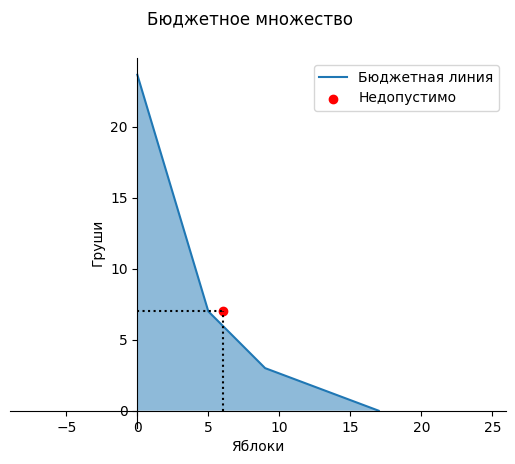

In [ ]:
def plot_budget2(g1: Good2, g2: Good2, budget, x, y):
  fig, ax = plt.subplots() # Создаем фигуру
  fig.suptitle("Бюджетное множество")
  a = (budget - g2.price1 * g2.threshold + g1.threshold * g1.price2 - g1.threshold* g1.price1)/g1.price2
  b = (budget - g1.price1 * g1.threshold + g2.threshold * g2.price2 - g2.threshold* g2.price1)/g2.price2
  # проверяем расположение точек
  if a >= g1.threshold:
      l1 = np.array([0, g1.threshold, a,  quantity(g1,budget)])
      l2 = np.array([quantity(g2,budget), b, g2.threshold, 0])
      ax.plot(l1,l2, label="Бюджетная линия")
      ax.fill_between(l1, l2, np.zeros_like(l1), alpha=0.5)
  else:
      l1 = np.array([0, a, g1.threshold,  quantity(g1,budget)])
      l2 = np.array([quantity(g2,budget), g2.threshold, b, 0])
      ax.plot(l1,l2, label="Бюджетная линия")
      ax.fill_between(l1, l2, np.zeros_like(l1), alpha=0.5)




  point_status = budget_test2(g1, g2, budget, x, y) # Находим статус проверяемой точки

    # В зависимости от статуса определяем цвет точки и надпись
  if point_status == 1:
      point_color = "green"
      point_label = "Допустимо"
  elif point_status == 0:
      point_color = "yellow"
      point_label = "На границе"
  else:
      point_color = "red"
      point_label = "Недопустимо"

  ax.scatter(x, y, color=point_color, label=point_label) # Рисуем точку
  ax.plot([x, x], [0, y], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
  ax.plot([0, x], [y, y], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)

    # Добавляем название осей
  ax.set_xlabel(g1.name)
  ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_visible(False)

  ax.axis('equal') # Принудительно делаем оси равными
  ax.legend() # Отображаем легенду (информацию о данных)
  plt.show() # Отображаем рисунок



g1 = Good2("Яблоки", 5, 10, 3)
g2 = Good2("Груши", 3, 8, 3)
budget = 86
plot_budget2(g1, g2, budget, 6, 7)

In [ ]:
def interactive_plot2(t1,p1_1,p1_2, t2,p2_1, p2_2, budget, x, y):
    g1 = Good2("Яблоки", t1, p1_1, p1_2)
    g2 = Good2("Груши", t2, p2_1, p2_2)
    plot_budget2(g1, g2, budget, x, y);

interact(interactive_plot2, t1 = (0,10), p1_1=(1, 10), p1_2 =(1,10), t2=(0, 10), p2_1 = (1, 10), p2_2=(1,10), budget=(1,100), x=(0,10), y=(0,10))

interactive(children=(IntSlider(value=5, description='t1', max=10), IntSlider(value=5, description='p1_1', max…

<function __main__.interactive_plot2(t1, p1_1, p1_2, t2, p2_1, p2_2, budget, x, y)>

## Обратная задача. <font color="red">Задание 12</font> <a id="task_12"></a>

Пусть нам даны четыре точки $A_1 = (a_{1,1}, a_{1,2})$, $A_2 = (a_{2,1}, a_{2,2})$, $A_3 = (a_{3,1}, a_{3,2})$ и $A_4 = (a_{4,1}, a_{4,2})$. Необходимо определить, существуют ли параметры Модели 3, т.е. значения __threshold > 0__, __price_1 > 0__ и __price_2 > 0__ для двух товаров такие, чтобы граница бюджетной линии содержала указанные точки. Если такие параметры существуют для рассматриваемой модели, то необходимо вывести параметры модели и изобразить ее бюджетное ограничение. Если таких параметров не существует, то необходимо вывести сообщение об этом.

Реализуйте графический интерактивный интерфейс, визуализирующий решение данной задачи по аналогии с тем, как это сделано для Модели 1.

In [ ]:
# Тут Ваш код

## Кривые безразличия. <font color="red">Задание 13</font> <a id="task_13"></a>

Для двух товаров из Модели 3 и кривой безразличия функции полезности Кобба-Дугласа найдите оптимальное решение и визуализируйте его при помощи интерактивного виджета.

Опишите, чем качественно ситуация с Моделью 3 отличается от ситуации с Моделями 1 и 2. Приведите примеры параметров Модели 3, которые демонстрируют данные различия.

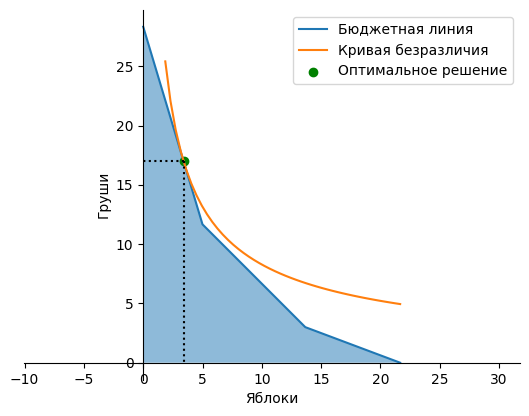

In [ ]:
x_solution =-10**3
y_solution = -10 ** 3
def budget_Cobb_Douglas_solution(g1: Good2, g2: Good2, budget, alpha=0.5):
  # выведем уравнения прямых для 6 случаев вида y = b + kx, где b будет свободным членом и будет бюджетом, k - цена товара 1, цена товара 2 будет равнятся 1
  # далее воспользуемся классической формулой для поиска оптимального количества с учетом ограничений для каждой прямой
  global x_solution
  global y_solution
  a = (budget - g2.price1 * g2.threshold + g1.threshold * g1.price2 - g1.threshold* g1.price1)/g1.price2
  b = (budget - g1.price1 * g1.threshold + g2.threshold * g2.price2 - g2.threshold* g2.price1)/g2.price2
  if a > g1.threshold:
    l1 = np.array([0, g1.threshold, a,  quantity(g1,budget)])
    l2 = np.array([quantity(g2,budget), b, g2.threshold, 0])
    k1 = (quantity(g2,budget) - b) / g1.threshold
    k2 =((b - g2.threshold) / (a - g1.threshold))
    k3 = (g2.threshold/(quantity(g1,budget) - a))

    b1 = quantity(g2,budget)
    b2 = b - g1.threshold * k2
    b3 = g2.threshold - a * k3

    x_solution1 = alpha*b1/ abs(k1)
    y_solution1 = (1-alpha)* b1

    x_solution2 = alpha*b2/abs(k2)
    y_solution2 = (1-alpha)*b2

    x_solution3 = alpha*b3/ abs(k2)
    y_solution3 = (1-alpha)* b3

    c1 = math.pow(abs(x_solution1), alpha)*math.pow(abs(y_solution1), 1-alpha)
    c2 = math.pow(abs(x_solution2), alpha)*math.pow(abs(y_solution2), 1-alpha)
    c3 = math.pow(abs(x_solution3), (alpha))*math.pow(abs(y_solution3), 1-alpha)

    m = max(c1,c2,c3)
    if m == c1 and 0<= x_solution1<=g1.threshold and b<=y_solution1<= quantity(g2,budget):
      x_solution = x_solution1
      y_solution = y_solution1
    elif m == c2 and g1.threshold<=x_solution2<=a and g2.threshold<=y_solution2<=b:
      x_solution = x_solution2
      y_solution =y_solution2
    elif m == c3 and a<=x_solution3<=quantity(g1,budget) and 0 <=y_solution3 <= g2.threshold:
      x_solution = x_solution3
      y_solution = y_solution3
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)
  elif a < g1.threshold:
    l1 = np.array([0, a, g1.threshold,  quantity(g1,budget)])
    l2 = np.array([quantity(g2,budget), g2.threshold, b, 0])
    k1 = ((quantity(g2,budget)- g2.threshold)/a)
    k2 = ((g2.threshold - b)/ (g1.threshold - a))
    k3 = (b/(quantity(g1,budget) - g1.threshold) )

    b1 = quantity(g2,budget)
    b2 = g2.threshold - a * k2
    b3 = b - g1.threshold * k3

    x_solution1 = alpha*b1/abs(k1)
    y_solution1 = (1-alpha)*b1

    x_solution2 = alpha*b2/abs(k2)
    y_solution2 = (1-alpha)*b2

    x_solution3 =alpha*b3/abs(k3)
    y_solution3 = abs((1-alpha)*b3)

    c1 = math.pow(abs(x_solution1), alpha)*math.pow(abs(y_solution1), 1-alpha)
    c2 = math.pow(abs(x_solution2), alpha)*math.pow(abs(y_solution2), 1-alpha)
    c3 = math.pow(abs(x_solution3), alpha)*math.pow(abs(y_solution3), 1-alpha)
    m = max(c1,c2,c3)
    if m == c1 and 0<= x_solution1<=a and g2.threshold<=y_solution1<= quantity(g2,budget):
      x_solution = x_solution1
      y_solution = y_solution1
    elif m == c2 and a<=x_solution2<=g1.threshold and b<=y_solution2<=g2.threshold:
      x_solution = x_solution2
      y_solution =y_solution2
    elif m == c3 and g1.threshold<=x_solution3<=quantity(g1,budget) and 0 <=y_solution3 <= b:
      x_solution = x_solution3
      y_solution = y_solution3
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)
  elif a == g1.threshold:

    l1 = np.array([0, a,  quantity(g1,budget)])
    l2 = np.array([quantity(g2,budget), g2.threshold, 0])
    k1 = ((quantity(g2,budget)- g2.threshold)/a)
    k2 = (g2.threshold/ ( quantity(g1,budget) - a))


    b1 = quantity(g2,budget)
    b2 = g2.threshold - a * k2


    x_solution1 = alpha*b1/abs(k1)
    y_solution1 = (1-alpha)*b1

    x_solution2 = alpha*b2/abs(k2)
    y_solution2 = (1-alpha)*b2


    c1 = math.pow(abs(x_solution1), alpha)*math.pow(abs(y_solution1), 1-alpha)
    c2 = math.pow(abs(x_solution2), alpha)*math.pow(abs(y_solution2), 1-alpha)

    m = max(c1,c2)
    if m == c1 and 0<= x_solution1<=a and g2.threshold<=y_solution1<= quantity(g2,budget):
      x_solution = x_solution1
      y_solution = y_solution1
    elif m == c2 and a<=x_solution2<=quantity(g1,budget) and 0<=y_solution2<=g2.threshold:
      x_solution = x_solution2
      y_solution =y_solution2
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)




def plot_budget_Cobb_Douglas1(g1, g2, budget, alpha=0.5):
  x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)


  fig, ax = plt.subplots()
  a = (budget - g2.price1 * g2.threshold + g1.threshold * g1.price2 - g1.threshold* g1.price1)/g1.price2
  b = (budget - g1.price1 * g1.threshold + g2.threshold * g2.price2 - g2.threshold* g2.price1)/g2.price2
  # проверяем расположение точек
  if a >= g1.threshold:
    l1 = np.array([0, g1.threshold, a,  quantity(g1,budget)])
    l2 = np.array([quantity(g2,budget), b, g2.threshold, 0])
    ax.plot(l1,l2, label="Бюджетная линия")
    ax.fill_between(l1, l2, np.zeros_like(l1), alpha=0.5)
  else:
    l1 = np.array([0, a, g1.threshold,  quantity(g1,budget)])
    l2 = np.array([quantity(g2,budget), g2.threshold, b, 0])
    ax.plot(l1,l2, label="Бюджетная линия")
    ax.fill_between(l1, l2, np.zeros_like(l1), alpha=0.5)


  x_values = np.linspace(0.1, quantity(g1,budget))
  y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
  filter = y_values < quantity(g2,budget)
  ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
  ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
  ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
  ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
  ax.set_xlabel(g1.name)
  ax.set_ylabel(g2.name)
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_visible(False)
  ax.axis('equal')
  ax.legend()
  plt.show()
g1 = Good2("Яблоки", 5, 10, 3)
g2 = Good2("Груши", 3, 8, 3)

budget = 100
alpha = 0.4
plot_budget_Cobb_Douglas1(g1, g2, budget, alpha)

In [ ]:
def interactive_plot2(t1,p1_1,p1_2, t2,p2_1, p2_2, budget, alpha):
    g1 = Good2("Яблоки", t1, p1_1, p1_2)
    g2 = Good2("Груши", t2, p2_1, p2_2)
    plot_budget_Cobb_Douglas1(g1, g2, budget, alpha=0.5)

interact(interactive_plot2, t1 = (0,10), p1_1=(1, 10), p1_2 =(1,10), t2=(0, 10), p2_1 = (1, 10), p2_2=(1,10), budget=(1,100),alpha = (0.1,0.9))

interactive(children=(IntSlider(value=5, description='t1', max=10), IntSlider(value=5, description='p1_1', max…

<function __main__.interactive_plot2(t1, p1_1, p1_2, t2, p2_1, p2_2, budget, alpha)>